In [1]:
!pip install scikit-multilearn

     |████████████████████████████████| 89 kB 3.4 MB/s eta 0:00:011


In [2]:
# Common libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA

# Libraries for Problem Transformation

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

# Libraries for model training

from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

# Libraries for algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Libraries for testing

from sklearn.metrics import accuracy_score , classification_report

# Removing warnings

import warnings
warnings.filterwarnings('ignore')

# Storing plots

%matplotlib inline

In [12]:
mydata = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [8]:
mydata.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [9]:
mydata.shape

(26707, 34)

In [13]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [14]:
mydata.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [15]:
mydata.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [16]:
mydata.duplicated().sum()

0

In [17]:
# For float fill missing values with the mean

mydata = mydata.fillna(mydata.mean())
mydata = round(mydata)

# For string fill missing value with 'No Category'

mydata = mydata.fillna('No Category')

In [18]:
mydata.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [19]:
# For Datatype = float

print("h1n1_worry")
print(mydata.h1n1_worry.unique())

print("h1n1_awareness")
print(mydata.h1n1_awareness.unique())

print("antiviral_medication")
print(mydata.antiviral_medication.unique())

print("contact_avoidance")
print(mydata.contact_avoidance.unique())

print("bought_face_mask")
print(mydata.bought_face_mask.unique())

print("wash_hands_frequently")
print(mydata.wash_hands_frequently.unique())

print("avoid_large_gatherings")
print(mydata.avoid_large_gatherings.unique())

print("reduced_outside_home_cont")
print(mydata.reduced_outside_home_cont.unique())

print("avoid_touch_face")
print(mydata.avoid_touch_face.unique())

print("dr_recc_h1n1_vacc")
print(mydata.dr_recc_h1n1_vacc.unique())

print("dr_recc_seasonal_vacc")
print(mydata.dr_recc_seasonal_vacc.unique())

print("chronic_medic_condition")
print(mydata.chronic_medic_condition.unique())

print("cont_child_undr_6_mnths")
print(mydata.cont_child_undr_6_mnths.unique())

print("is_health_worker")
print(mydata.is_health_worker.unique())

print("has_health_insur")
print(mydata.has_health_insur.unique())

print("is_h1n1_vacc_effective")
print(mydata.is_h1n1_vacc_effective.unique())

print("is_h1n1_risky")
print(mydata.is_h1n1_risky.unique())

print("sick_from_h1n1_vacc")
print(mydata.sick_from_h1n1_vacc.unique())

print("is_seas_vacc_effective")
print(mydata.is_seas_vacc_effective.unique())

print("is_seas_risky")
print(mydata.is_seas_risky.unique())

print("sick_from_seas_vacc")
print(mydata.sick_from_seas_vacc.unique())

h1n1_worry
[1. 3. 2. 0.]
h1n1_awareness
[0. 2. 1.]
antiviral_medication
[0. 1.]
contact_avoidance
[0. 1.]
bought_face_mask
[0. 1.]
wash_hands_frequently
[0. 1.]
avoid_large_gatherings
[0. 1.]
reduced_outside_home_cont
[1. 0.]
avoid_touch_face
[1. 0.]
dr_recc_h1n1_vacc
[0. 1.]
dr_recc_seasonal_vacc
[0. 1.]
chronic_medic_condition
[0. 1.]
cont_child_undr_6_mnths
[0. 1.]
is_health_worker
[0. 1.]
has_health_insur
[1. 0.]
is_h1n1_vacc_effective
[3. 5. 4. 2. 1.]
is_h1n1_risky
[1. 4. 3. 2. 5.]
sick_from_h1n1_vacc
[2. 4. 1. 5. 3.]
is_seas_vacc_effective
[2. 4. 5. 3. 1.]
is_seas_risky
[1. 2. 4. 3. 5.]
sick_from_seas_vacc
[2. 4. 1. 5. 3.]


In [21]:
# For Datatype = object

print("age_bracket")
print(mydata.age_bracket .unique())

print("qualification ")
print(mydata.qualification .unique())

print("race")
print(mydata.race.unique())

print("sex")
print(mydata.sex.unique())

print("income_level")
print(mydata.income_level.unique())

print("marital_status")
print(mydata.marital_status.unique())

print("housing_status")
print(mydata.housing_status.unique())

print("employment")
print(mydata.employment.unique())

print("census_msa")
print(mydata.census_msa.unique())

print("no_of_adults ")
print(mydata.no_of_adults.unique())

print("no_of_children")
print(mydata.no_of_children.unique())

print("h1n1_vaccine")
print(mydata.h1n1_vaccine.unique())

age_bracket
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
qualification 
['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'No Category']
race
['White' 'Black' 'Other or Multiple' 'Hispanic']
sex
['Female' 'Male']
income_level
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' 'No Category']
marital_status
['Not Married' 'Married' 'No Category']
housing_status
['Own' 'Rent' 'No Category']
employment
['Not in Labor Force' 'Employed' 'Unemployed' 'No Category']
census_msa
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']
no_of_adults 
[0. 2. 1. 3.]
no_of_children
[0. 3. 2. 1.]
h1n1_vaccine
[0 1]


In [22]:
# encoding the object

enc = LabelEncoder()

In [23]:
mydata.age_bracket = enc.fit_transform(mydata.age_bracket)
mydata.qualification  = enc.fit_transform(mydata.qualification )
mydata.race = enc.fit_transform(mydata.race)
mydata.sex = enc.fit_transform(mydata.sex)
mydata.income_level = enc.fit_transform(mydata.income_level)
mydata.marital_status = enc.fit_transform(mydata.marital_status)
mydata.housing_status = enc.fit_transform(mydata.housing_status)
mydata.employment = enc.fit_transform(mydata.employment)
mydata.census_msa = enc.fit_transform(mydata.census_msa)
mydata.no_of_adults = enc.fit_transform(mydata.no_of_adults)
mydata.no_of_children = enc.fit_transform(mydata.no_of_children)
mydata.h1n1_vaccine = enc.fit_transform(mydata.h1n1_vaccine)

In [24]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [25]:
mydata.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,2,1,2,2,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,2,2,0,0,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,2,1,0,0,2,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,0,2,2,2,2,1,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,0,0,1,0,0,1,0,0


In [27]:
mydata.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,...,2.570300,0.406223,0.953795,0.932190,1.145542,0.984161,0.833489,0.887558,0.538922,0.212454
std,7709.791156,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,...,0.923226,0.491136,1.113444,0.970936,0.526582,1.052723,0.823313,0.749980,0.924918,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,1.000000


In [28]:
# Function to find the outliers

def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)

In [29]:
print(len(findoutliers(mydata.no_of_adults)))
print(len(findoutliers(mydata.no_of_children)))

1125
1747


In [30]:
findoutliers(mydata.no_of_adults)

array([3, 3, 3, ..., 3, 3, 3])

In [31]:
findoutliers(mydata.no_of_children)

array([3, 3, 3, ..., 3, 3, 3])

<AxesSubplot:xlabel='no_of_adults'>

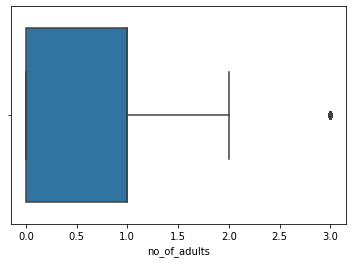

In [32]:
# Visualising the outliers
sns.boxplot(mydata.no_of_adults)

<AxesSubplot:xlabel='no_of_children'>

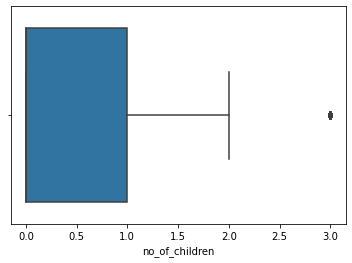

In [33]:
sns.boxplot(mydata.no_of_children)

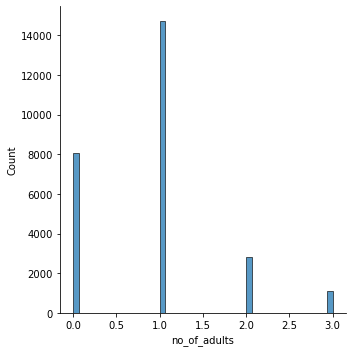

In [34]:
# Visualizing numerical data

sns.displot(mydata.no_of_adults)

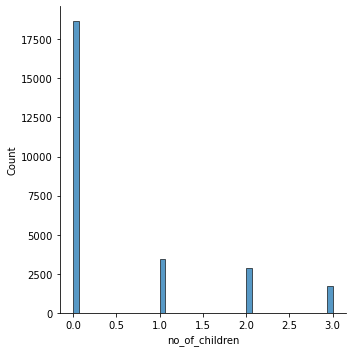

In [35]:
sns.displot(mydata.no_of_children)

In [36]:
mydata.h1n1_worry.value_counts()

2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

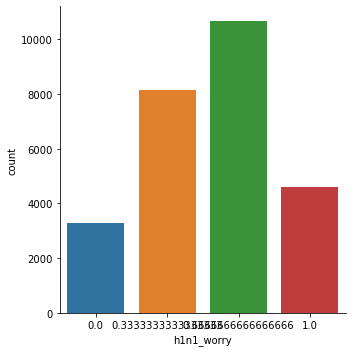

In [105]:
sns.factorplot('h1n1_worry', data = mydata, kind = "count")

In [39]:
mydata.h1n1_awareness.value_counts()

1.0    14714
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64

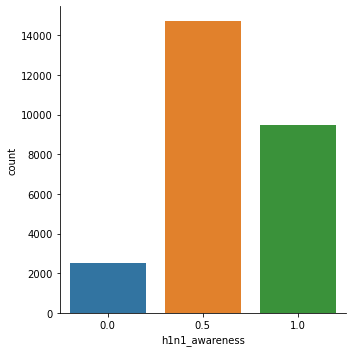

In [106]:
sns.factorplot('h1n1_awareness', data = mydata, kind = "count")

In [41]:
mydata.antiviral_medication.value_counts()

0.0    25406
1.0     1301
Name: antiviral_medication, dtype: int64

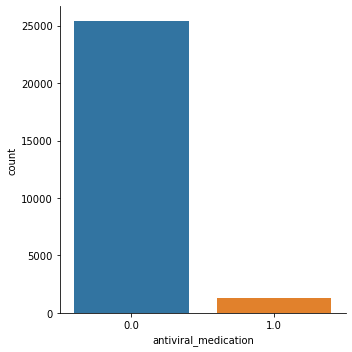

In [107]:
sns.factorplot('antiviral_medication', data = mydata, kind = "count")

In [43]:
mydata.contact_avoidance.value_counts()

1.0    19436
0.0     7271
Name: contact_avoidance, dtype: int64

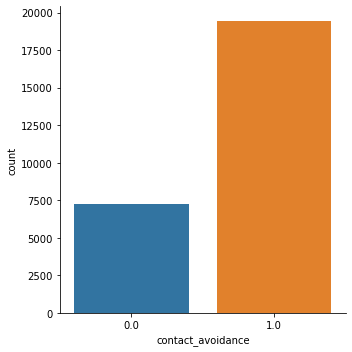

In [108]:
sns.factorplot('contact_avoidance',data = mydata, kind = "count")

In [45]:
mydata.bought_face_mask.value_counts()

0.0    24866
1.0     1841
Name: bought_face_mask, dtype: int64

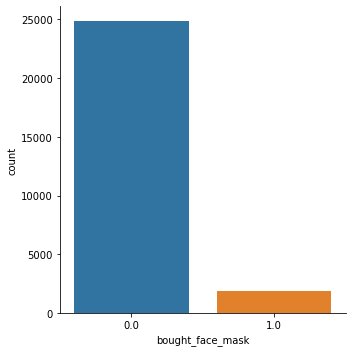

In [109]:
sns.factorplot('bought_face_mask',data = mydata, kind = "count")

In [47]:
mydata.wash_hands_frequently.value_counts()

1.0    22057
0.0     4650
Name: wash_hands_frequently, dtype: int64

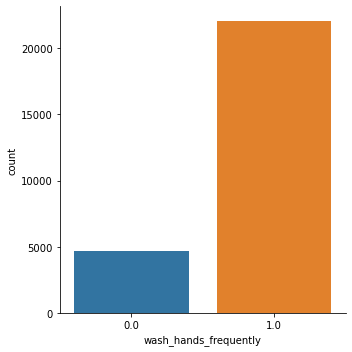

In [110]:
sns.factorplot('wash_hands_frequently',data = mydata, kind = "count")

In [49]:
mydata.avoid_large_gatherings.value_counts()

0.0    17160
1.0     9547
Name: avoid_large_gatherings, dtype: int64

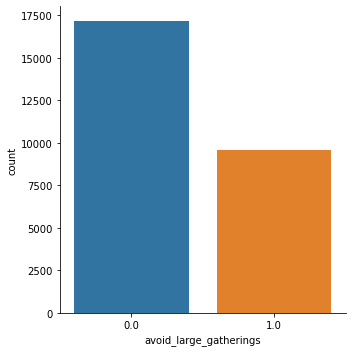

In [111]:
sns.factorplot('avoid_large_gatherings',data = mydata, kind = "count")

In [51]:
mydata.reduced_outside_home_cont.value_counts()

0.0    17726
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

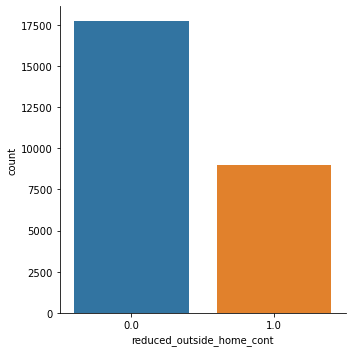

In [112]:
sns.factorplot('reduced_outside_home_cont', data = mydata, kind = "count")

In [53]:
mydata.avoid_touch_face.value_counts()

1.0    18129
0.0     8578
Name: avoid_touch_face, dtype: int64

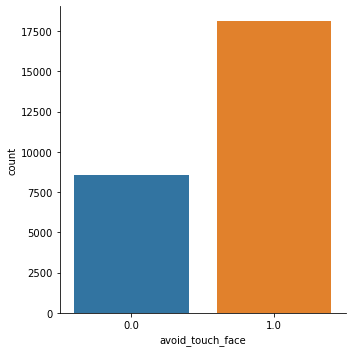

In [113]:
sns.factorplot('avoid_touch_face',data = mydata, kind = "count")

In [80]:
mydata.dr_recc_h1n1_vacc.value_counts()

0.0    21299
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

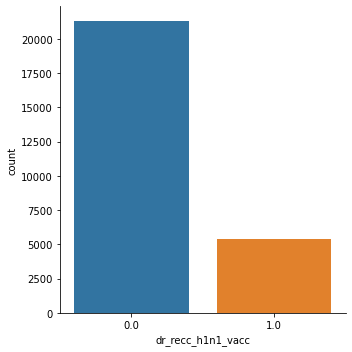

In [114]:
sns.factorplot('dr_recc_h1n1_vacc',data = mydata, kind = "count")

In [82]:
mydata.dr_recc_seasonal_vacc.value_counts()

0.0    18613
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64

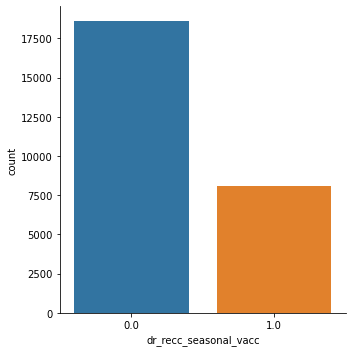

In [115]:
sns.factorplot('dr_recc_seasonal_vacc',data = mydata, kind = "count")

In [84]:
mydata.chronic_medic_condition.value_counts()

0.0    19417
1.0     7290
Name: chronic_medic_condition, dtype: int64

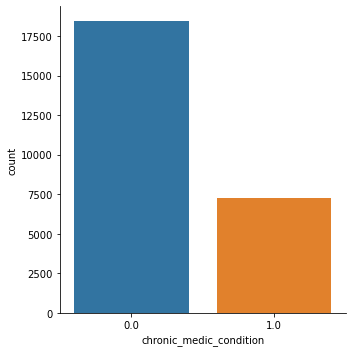

In [85]:
sns.factorplot('chronic_medic_condition',data = mydata, kind = "count")

In [86]:
mydata.cont_child_undr_6_mnths.value_counts()

0.0    24569
1.0     2138
Name: cont_child_undr_6_mnths, dtype: int64

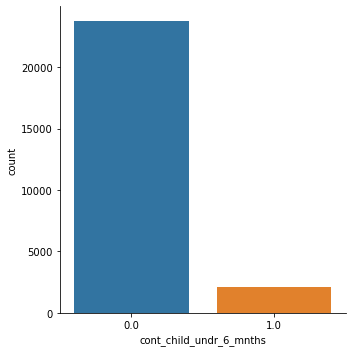

In [87]:
sns.factorplot('cont_child_undr_6_mnths', data = features, kind = "count")

In [88]:
mydata.is_health_worker.value_counts()

0.0    23808
1.0     2899
Name: is_health_worker, dtype: int64

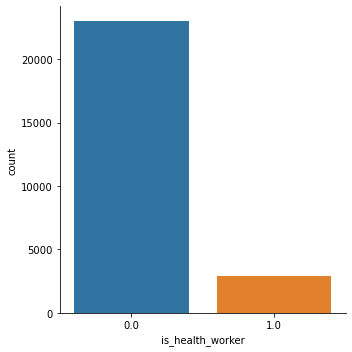

In [89]:
sns.factorplot('is_health_worker', data = features, kind = "count")

In [90]:
mydata.has_health_insur.value_counts()

1.0    24971
0.0     1736
Name: has_health_insur, dtype: int64

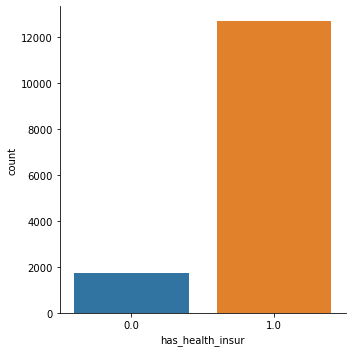

In [91]:
sns.factorplot('has_health_insur', data = features, kind = "count")

In [92]:
mydata.is_h1n1_vacc_effective.value_counts()

0.75    12074
1.00     7166
0.50     4723
0.25     1858
0.00      886
Name: is_h1n1_vacc_effective, dtype: int64

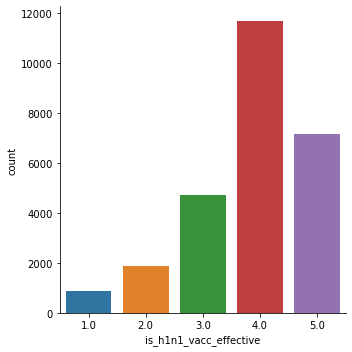

In [93]:
sns.factorplot('is_h1n1_vacc_effective', data = features, kind = "count")

In [94]:
mydata.is_h1n1_risky.value_counts()

0.25    10307
0.00     8139
0.75     5394
1.00     1750
0.50     1117
Name: is_h1n1_risky, dtype: int64

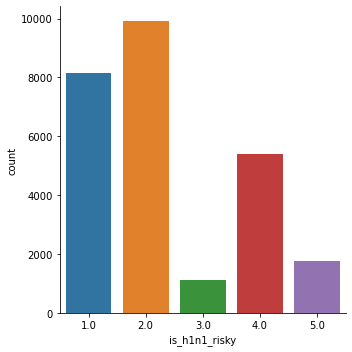

In [95]:
sns.factorplot('is_h1n1_risky', data = features, kind = "count")

In [96]:
mydata.sick_from_h1n1_vacc.value_counts()

0.25    9524
0.00    8998
0.75    5850
1.00    2187
0.50     148
Name: sick_from_h1n1_vacc, dtype: int64

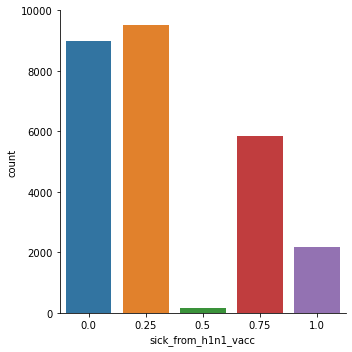

In [104]:
sns.factorplot('sick_from_h1n1_vacc', data = mydata, kind = "count")

In [98]:
mydata.is_seas_vacc_effective.value_counts()

0.75    12091
1.00     9973
0.25     2206
0.00     1221
0.50     1216
Name: is_seas_vacc_effective, dtype: int64

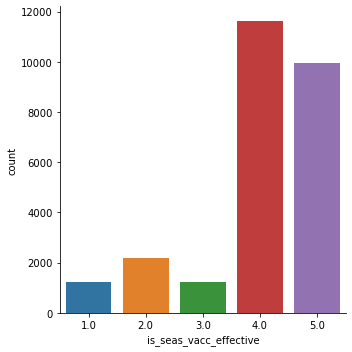

In [99]:
sns.factorplot('is_seas_vacc_effective', data = features, kind = "count")

In [100]:
mydata.is_seas_risky.value_counts()

0.25    8954
0.75    7630
0.00    5974
1.00    2958
0.50    1191
Name: is_seas_risky, dtype: int64

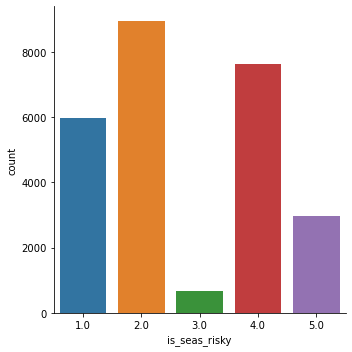

In [101]:
sns.factorplot('is_seas_risky', data = features, kind = "count")

In [102]:
mydata.sick_from_seas_vacc.value_counts()

0.00    11870
0.25     8170
0.75     4852
1.00     1721
0.50       94
Name: sick_from_seas_vacc, dtype: int64

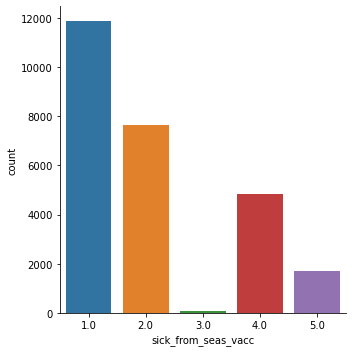

In [103]:
sns.factorplot('sick_from_seas_vacc', data = features, kind = "count")

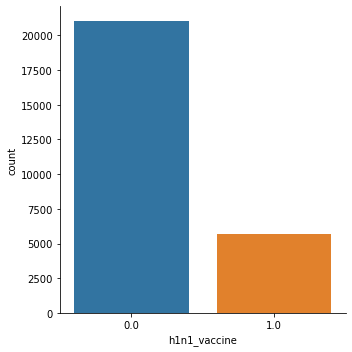

In [117]:
sns.factorplot('h1n1_vaccine', data = mydata, kind = "count")

In [121]:
mydata.corrwith(mydata.h1n1_vaccine)

unique_id                   -0.003280
h1n1_worry                   0.121574
h1n1_awareness               0.117771
antiviral_medication         0.040226
contact_avoidance            0.046837
bought_face_mask             0.070413
wash_hands_frequently        0.074570
avoid_large_gatherings       0.018089
reduced_outside_home_cont    0.022080
avoid_touch_face             0.070855
dr_recc_h1n1_vacc            0.394086
dr_recc_seasonal_vacc        0.218976
chronic_medic_condition      0.094360
cont_child_undr_6_mnths      0.066712
is_health_worker             0.168056
has_health_insur             0.041891
is_h1n1_vacc_effective       0.267352
is_h1n1_risky                0.320580
sick_from_h1n1_vacc          0.074580
is_seas_vacc_effective       0.177799
is_seas_risky                0.255955
sick_from_seas_vacc          0.008415
age_bracket                  0.041074
qualification                0.020766
race                         0.041061
sex                         -0.020672
income_level

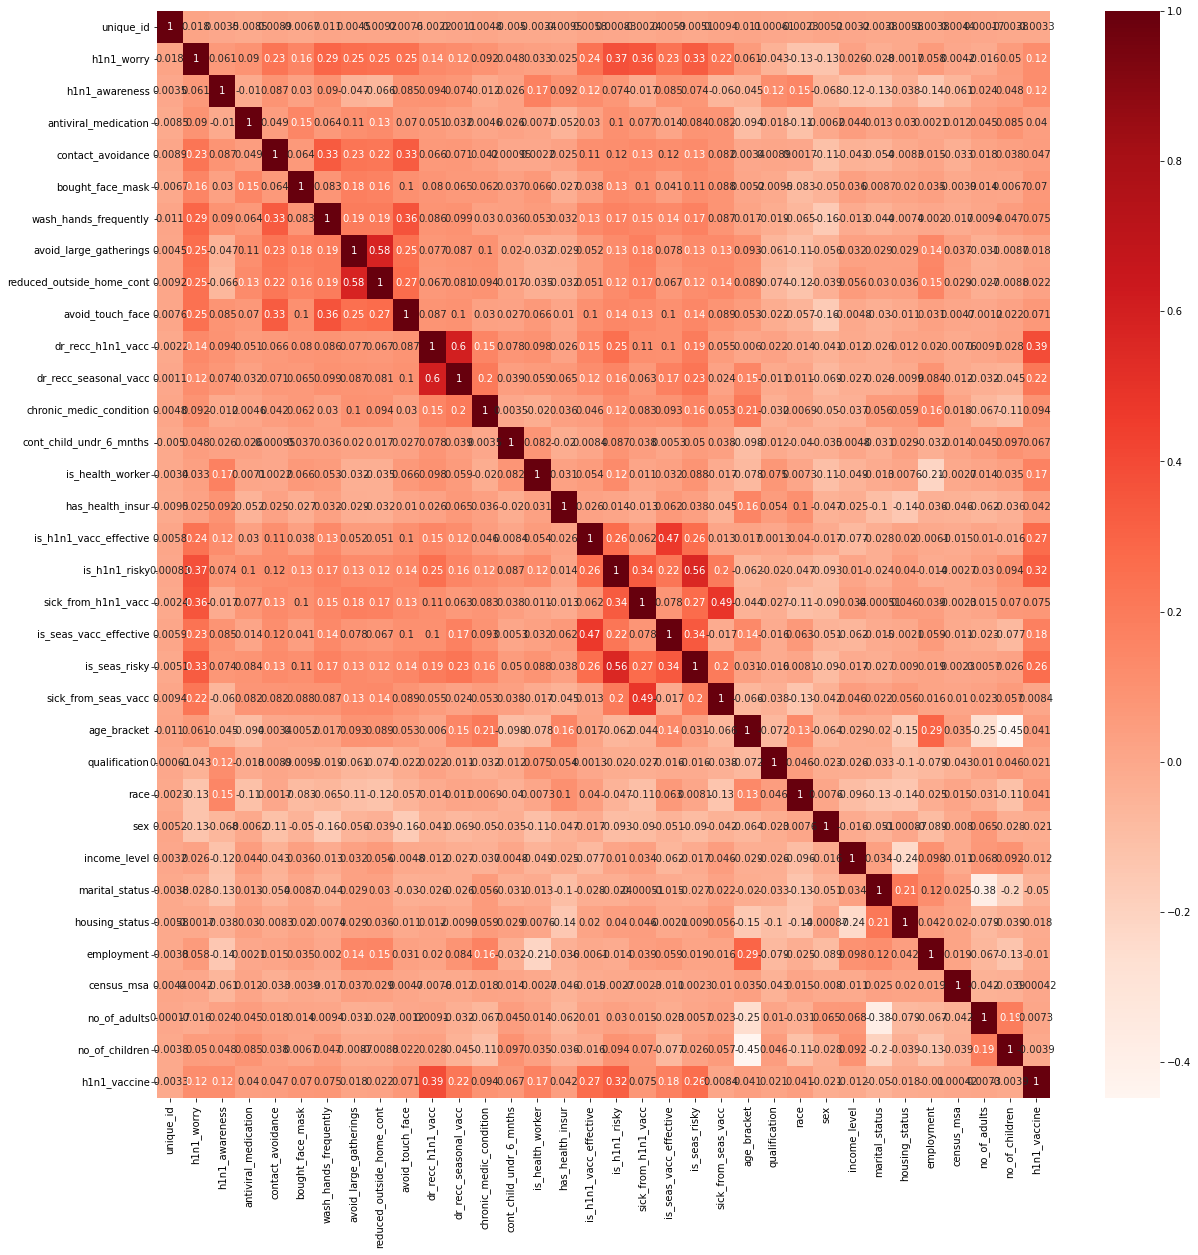

In [129]:
#get correlations of each features in dataset
corrmat = mydata.corr()
top_corr_mydata = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(mydata[top_corr_mydata].corr(),annot=True,cmap="Reds")

In [130]:
x=mydata.drop(['h1n1_vaccine'],axis=1)
y=mydata[['h1n1_vaccine']]

In [131]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=23)

In [135]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=3)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [136]:
model.score(x_train,y_train)

0.2407646877753583

In [137]:
model.score(x_test,y_test)

0.2383857304201884

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LinearRegression

x = x.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

x.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [139]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [140]:
model.score(x_train,y_train)

0.26131739211713756

In [141]:
model.score(x_test,y_test)

0.26446244914628025

In [142]:
#y_pred = LinearRegression.predict(x_test)
# Fitting Simple Linear Regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  # <-- you need to instantiate the regressor like so 
regressor.fit(x_train, y_train) # <-- you need to call the fit method of the regressor

# Predicting the Test set results
y_pred = regressor.predict(x_test)

In [143]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

0.26446244914628025

In [146]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(x_train2, y_train)

#y_pred = poly_clf.predict(x_test2)
#print(y_pred)
#In sample (training) R^2 will always impove with the number of variables !

print(poly_clf.score(x_train2,y_train))

0.3137264010541867


In [147]:
print(poly_clf.score(x_train2,y_train))

0.3137264010541867


In [148]:
print(poly_clf.score(x_test2,y_test))

0.2761985451655171


In [150]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(n_estimators = 100 , base_estimator = model , max_samples = 1.0)

In [151]:
model.fit(x_train,y_train)

BaggingRegressor(base_estimator=LinearRegression(), n_estimators=100)

In [152]:
model.score(x_train,y_train)

0.26130392741887254

In [153]:
model.score(x_test,y_test)

0.264374190024085

In [154]:
from sklearn.ensemble import AdaBoostRegressor

In [156]:
model= AdaBoostRegressor()

In [157]:
model.fit(x_train,y_train)

AdaBoostRegressor()

In [158]:
model.score(x_train,y_train)

0.23848700548469448

In [159]:
model.score(x_test,y_test)

0.2415673294337226